# 11. Groundwater Modeling

MODFLOW 6, is an industry-standard tool for groundwater modeling, allows for the integration of complex transport processes with hydraulic flow simulations. Through practical examples, we will demonstrate how to model contaminant migration, interface with Python for enhanced data manipulation, and analyze the impact of environmental variables on transport dynamics.

:::{admonition} Course Website
[Link to Course Website](http://54.243.252.9/ce-3354-webroot/)
:::

---
## Readings

1. [Bear and Cheng](http://54.243.252.9/ce-5364-webroot/3-Readings/BearCheng2010/978-1-4020-6682-5.pdf)

2. [Bedient etal.](http://54.243.252.9/ce-5364-webroot/3-Readings/Bedient_et_al/Bedient_et_al._Complete%20reduced.pdf)

3. [Bear, J. (1972) *Dynamics of Fluids in Porous Media* McGraw Hill (pp. 628-629)](https://www.amazon.com/Dynamics-Fluids-Porous-Mechanical-Engineering/dp/0486656756)

4. [Groundwater Modeling Exercise (used in ModelMUSE video)](http://54.243.252.9/ce-4363-webroot/3-Readings/Groundwater_modelling_exercise.pdf)

2. [MODFLOW Notes (Cleveland circa 1992)](http://54.243.252.9/ce-4363-webroot/3-Readings/modflowNotes01.pdf)  The Obleo Aquifer simulation in the MODFLOW88 video is described in these notes.

3. [MODFLOW Manual (US EPA)](http://54.243.252.9/ce-4363-webroot/3-Readings/modflmn.pdf) An EPA training document on the use of MODFLOW

4. [Zheng, C. and Wang, P.P. (1999) *MT3DMS: A Modular Three-Dimensional Multispecies Transport Model for Simulation of Advection, Dispersion, and Chemical Reactions of Contaminants in Groundwater Systems; Documentation and User's Guide* Strategic Environmental Research and Development Program, Final Report SERDP-99-1](http://54.243.252.9/ce-5364-webroot/3-Readings/MT3DMS/MT3DMS-1999-Report.pdf)

5. [Zheng, C. and Bennett, G.D. (1995) *Applied Contaminant Transport Modeling* Van Nostrand Reinhold](http://54.243.252.9/ce-5364-webroot/ce5364notes/chapters/3advection/Advection.PDF)

6. [FloPy: Python Package for Creating, Running, and Post-Processing MODFLOW-Based Models ](https://www.usgs.gov/software/flopy-python-package-creating-running-and-post-processing-modflow-based-models)

7. [MT3DMS Problem 9 (On-line documentation for MT3D)](https://modflow6-examples.readthedocs.io/en/master/_notebooks/ex-gwt-mt3dms-p09.html)

8. [MODFLOW6 Transport Model Documentation](https://pubs.usgs.gov/tm/06/a61/tm6a61.pdf)

9. [Bravo,R., Rogers, J.R., and T.G. Cleveland, 1996. ``Modeling Groundwater Flow using Flux Boundary Conditions.'' Water Resources Bulletin, Vol 32., No. 1, pp 39-46](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/journal_papers/AWRA_WRB_1996/AWRA_WRB_1996.pdf)

10. [Cleveland, T.G. and W. W-G. Yeh, 1991. Optimal Configuration and Scheduling of a Groundwater Tracer Test, Journal of Water Resources Planning and Management, American Society of Civil Engineers, Vol. 117, No. 1, pp 37-51.](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/journal_papers/optimal_tracer_asce_1991/optimal_tracer_asce_1991.pdf)

11. [Cleveland, T.G. and W. W-G. Yeh, 1990. Sampling Network Design for Transport Parameter Identification, Journal of Water Resources Planning and Management, American Society of Civil Engineers, Vol. 116, No. 6, pp 764-782.](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/journal_papers/ASCE_JWRPM_1990A/ASCE_JWRPM_1990A.pdf)

## Videos



## Overview of MODFLOW 6 and Python's role in contaminant transport modeling.

MODFLOW 6 is a powerful and flexible software for simulating groundwater flow, supporting modular approaches to incorporate various physical processes, including contaminant transport. When combined with Python, particularly using libraries like flopy, the process of setting up, running, and analyzing MODFLOW models becomes more efficient and customizable. Python’s role extends beyond automation, enabling seamless integration of transport modeling, advanced data handling, and real-time visualization of contaminant movement within groundwater systems.

## Importance of Leveraging Python for Automation and Customization in Groundwater Modeling

Python has become an essential tool in groundwater modeling due to its flexibility, ease of use, and ability to streamline complex workflows. When working with models like MODFLOW 6, creating and managing input files manually can be a tedious and error-prone process, particularly for large or multi-scenario simulations. Python allows us to automate these repetitive tasks efficiently. For instance, using libraries like `flopy`, we can automate the generation, manipulation, and validation of input files, significantly reducing the time required to set up models.

Beyond automation, Python also enables a high degree of customization. Groundwater models often require unique configurations tailored to specific environmental conditions or project objectives. With Python, we can write custom scripts to modify model parameters, handle boundary conditions dynamically, or integrate external datasets, such as real-time hydrological data or geospatial information. This customization not only saves time but also enhances the accuracy and flexibility of the model, making it easier to adapt to changing project needs.

Moreover, Python’s vast ecosystem of libraries (like `numpy`, `pandas`, and `matplotlib`) supports advanced data analysis and visualization, allowing engineers and scientists to interpret simulation results more effectively. Instead of manually reviewing raw output files, Python can be used to automate the extraction of key metrics, generate plots, and even create animated visualizations of flow and contaminant transport. This capacity for automation and customization makes Python an invaluable tool for modern groundwater modeling, enabling professionals to focus more on the science and decision-making, rather than the intricacies of file management and data processing.

## Installation and Configuration of MODFLOW 6

I use MODFLOW 6 with FloPy to create, run, and interpret simulations. Personally, I can barely get ModelMuse to cooperate, and while Groundwater Vistas is another option, you're better off following their tutorials if you go that route.

The hardware requirements for MODFLOW 6 are modest—you don’t need a supercomputer. But if you happen to have access to the NSA’s ECL Supercomputer, MODFLOW will run just fine there too (it already supports parallel processing, and the CUDA Fortran stack can even target GPUs). Why a signals intelligence agency would need MODFLOW is beyond me—but stranger things have happened.

For a more grounded example: I’ve successfully compiled and run MODFLOW 6 on a Raspberry Pi 3B with 4 GB of RAM. For that ARM-based aarch64 architecture, I built MODFLOW from source using gfortran and ran everything from a local directory with explicitly defined binary paths. Definitely geek territory—but it demonstrates that with some persistence, the code and Python interface can run just about anywhere.

So yes, it should run on your laptop. If you use Jupyter notebooks inside Anaconda, you may need to fuss with environment paths and dependencies a bit to get everything working smoothly.

I’ve included general installation workflows for those who prefer ModelMuse or Groundwater Vistas—but you're largely on your own with those interfaces. In my view, they don’t simplify model construction enough to outweigh their quirks (though they can produce prettier graphics—nothing you can’t match in Python with a bit of effort).

:::{warning}
MODFLOW 6 is a powerful but complex modeling tool, and integrating it with Python via the USGS API requires careful setup. This has never been a point-and-click system, and even graphical interfaces like ModelMuse (USGS) or Groundwater Vistas (commercial) do not eliminate the need for correct installation and configuration. Much of this complexity reflects the software’s evolution—from early Fortran V through Fortran 77, Fortran 90, and now object-oriented Fortran. The shift toward Python scripting aligns with trends in scientific computing and will likely remain the standard interface going forward. While the setup may seem daunting at first, it's a reflection of the tool's flexibility and long-term capabilities.
:::

### MODFLOW 6 and ModelMUSE (a USGS supplied GUI)

This is a common way to use MODFLOW, with a GUI.  The install is not that hard, but also not point and click.  A video showing an installation is available for viewing at:

- [Installing ModelMuse and MODFLOW 6 on a local computer](https://www.youtube.com/watch?v=x_D_rvsQ-tI&feature=youtu.be)

The installation process is:

1. GOOGLE "modflow 6"  and/or select: [https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model](https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model) Download the MODFLOW 6 program (choose windows installer)

2. GOOGLE "ModelMuse" and/or select: [https://www.usgs.gov/software/modelmuse-a-graphical-user-interface-groundwater-models](https://www.usgs.gov/software/modelmuse-a-graphical-user-interface-groundwater-models)  Download the interface program (installer for 32/64 bit.  When you get a real job, have an IT professional do the install and testing - they can set environment variables in the OS correctly.

3. Create C:/WRDAPP folder to house modflow binaries - note the folder attaches at C:/  any other path will probably mess things up later on.

4. Install ModelMuse using installer (double click, accept defaults)

5. Move the modflow package into C:/WRDAPP folder, extract package, put into folder root.

6. Start ModelMuse
  - create MODFLOW
  - next
  - next
  - Model/MODFLOW Program Locations
  - set the directory path (may need to edit names a bit)
  
7. Restart ModelMuse and run tutorial.
  - Pray for smiley faces!
  - Yay! Install complete. 

### MODFLOW 6 and Groundwater Vistas (a Commercial GUI)

Groundwater Vistas (GV) is a professional graphical interface for MODFLOW, used widely in consulting and advanced modeling. The installation is relatively straightforward, but still requires attention to directory structure and model configuration. A valid license is needed for full functionality, though a trial version is available.

#### Installation Workflow

1. **Download Groundwater Vistas:**

   - Visit: [https://www.groundwatermodels.com](https://www.groundwatermodels.com)
   - Navigate to the **Downloads** section and select the latest version (e.g., GV 8).
   - Download and run the installer.

2. **Install GV:**

   - Run the installer and accept default options (e.g., `C:/GWV8`).
   - If prompted, allow installation of supporting files such as MS Visual C++ redistributables.

3. **Download MODFLOW 6 Executables:**

   - Visit: [https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model](https://www.usgs.gov/software/modflow-6-usgs-modular-hydrologic-model)
   - Download the **ZIP package** for Windows (not the installer).
   - Extract contents to a folder such as `C:/WRDAPP/MODFLOW6` (avoid spaces in paths).

4. **Configure MODFLOW 6 in GV:**

   - Launch GV.
   - Go to: `Model → Select Flow Model → MODFLOW 6`
   - Then: `Model → MODFLOW 6 → Set Program Locations`
   - Browse to the folder where `mf6.exe` resides.

5. **Test the Setup:**

   - Open or create a MODFLOW 6 model.
   - Use `Model → MODFLOW 6 → Run MODFLOW` to test execution.
   - Check for convergence and successful output.

6. **(Optional) Add Other Solvers:**

   - GV supports tools like MODPATH, SEAWAT, and MT3DMS.
   - Download and link these in the `Set Program Locations` menu as needed.

#### Notes

- MODFLOW 6 must be installed and linked manually — GV does not include the binaries.
- Avoid folders with spaces or special characters in the path.
- Use `Model → Check Model` if errors arise during simulation.
- Licensed users can contact Environmental Simulations, Inc. for technical support.



### MODFLOW 6 and FloPy (Python Interface via Jupyter Notebooks)

FloPy is the most flexible and scriptable way to work with MODFLOW 6, particularly for those using Python and Jupyter Notebooks. It enables fully programmable model creation, execution, and post-processing—all without relying on a graphical interface.

This is the method used in this course and on our JupyterHub server.

- **FloPy official site (USGS):**  
  [FloPy: Python Package for Creating, Running, and Post-Processing MODFLOW-Based Models](https://www.usgs.gov/software/flopy-python-package-creating-running-and-post-processing-modflow-based-models)

- **Step-by-step installation notes (PDF):**  
  [MODFLOW on a Jupyter Server – Notes](http://54.243.252.9/ce-4363-webroot/ce4363notes/lessons/groundwatermodels/installing.pdf)  
  (Includes command-line I/O, installation examples, and working test cases)

#### Installation Workflow

1. **Install FloPy into Your Python Kernel:**

   On a managed server or shared environment (e.g., JupyterHub), you'll likely need admin privileges:

   ```bash
   # Become root or use a sudo-capable account
   sudo -H /opt/jupyterhub/bin/python3 -m pip install flopy
   ```

   <br>On a personal machine or local virtual environment:

   ```bash
   pip install flopy
   ```
   <br>

2. **Download MODFLOW 6 Binaries:**

   Use the `get-modflow` script to fetch the correct MODFLOW 6 binary distribution for your architecture:

   ```python
   # Inside a Jupyter cell, assuming Linux/Intel:
   ! get-modflow /home/your_username/path/to/modflow/bin
   ```

   <br>On Windows or Mac, refer to the PDF guide for architecture-specific instructions. The target folder must exist before downloading.

3. **Verify Setup:**

   - Test a sample script using `flopy.get_modflow`.
   - Confirm that your model runs without errors and that binary output files (e.g., `.hds`, `.cbc`) are created.
   - If MODFLOW 6 is not found, specify the path explicitly in FloPy’s `mf6` object using the `exe_name` parameter.

#### Notes for AWS or Custom Linux Servers

- On ARM-based devices (e.g., Raspberry Pi), MODFLOW 6 must be compiled from source using `gfortran`. See the PDF for Raspberry Pi notes.
- Explicitly setting binary paths may be required when the executable is not in `$PATH`.

#### Sample Progression of Models in This Lesson:

Once installed, the following three examples are provided to walk you through progressively more complex use cases:

1. **Steady-state flow in a single-layer aquifer**
2. **Transient flow in a single-layer aquifer**
3. **Transient flow in a multi-layer aquifer**

:::{tip}
Once you have these three examples working, the best way to build your own model is to modify one of them incrementally to match your site-specific conditions. This slow but reliable approach makes it easier to isolate issues when things break—and they *will* break—ensuring you always have a working fallback model to return to.
:::


:::{admonition} Specific to this host AWS server 

The two cells below are one-time commands to install and get the binaries

To add flopy to the python kernel:

```python
# su to a member of wheel or sudoers, then execute:
sudo -H /opt/jupyterhub/bin/python3 -m pip install flopy
# exit shell - flopy is added to the kernel
```

To get current binaries (for intel architecture):

```python
# open a Jupyter notebook; then execute (path must exist):
! get-modflow /home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin
#

:::

# 11.2  Steady Flow, Single Layer Aquifer

:::{note} This section was orginally a worked example using `FLOPY` and `MODFLOW6` installed on a `aarch-64` computer.  `x86-...` architectures should use the `! get-modflow` method to download (in near real time) current binaries.  Modifications to the notes were made to get it to run natively on AWS:::

## Obleo Aquifer Example

This is a steady-state model of the Obleo aquifer system depicted below:

![](obleoaquifer.png)

Sone added information about the system is:

![](obleoparticulars.png)

The general goals for the analysis are:

![](obleogoals.png)

So with a little infomration regarding how we will manage elevations we can move forward with the modeling effort.

![](obleovertdatum.png)

Now onto **modflow**

:::{warning}
Nearly every cell throws a deprecation warning, that filterwarnings('ignore') fails to suppress.  Code seems to still run on my server, but over time as new updates are added to the kernel the code at some point will fail without addressing the warning.  The development computer is `aarch64` an arm processor.  The AWS server is `amd64/intel` architecture, which gets a lot of code development so should stay current longer.  This continuous integration CI and push changes model of modern IT support is phenomenally annoying, but for time being have to get used to it.
:::

In [1]:
%reset -f

In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [4]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/example_2" # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-3354-webroot/hydrohandbook/chapters/11-groundwatermodels/mfexperiments/example_1" # location on MY computer to store files this example (directory must already exist)


# Set Simulation Name
name = "example02_obleo"

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [5]:
# Set Time Structure
Time_Units="YEARS"

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=1, perioddata=[(1.0, 1, 1.0)]
)

In [6]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [7]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [8]:

# Define The Grid
Nlay = 1 #number layers
Nrow = 11 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 100.0 # elevation of top of aquifer
thick = 1000.0 #aquifer thickness

bot = [topelev-thick] # bot is a list with Nlay entries
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [9]:
# Define initial conditions
h1 = 0.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [10]:
# Define hydraulic conductivity arrays
K = 3650.0
k = K * np.ones((Nlay, Nrow, Ncol)) # Hydraulic conductivity is K everywhere
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky


##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [11]:
# Define constant head boundary conditions
chd_rec = []
#h2 = 90 # Just a different value 
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
for layer in range(0, Nlay):
    for row in range(0, Nrow):
        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=chd_rec,save_flows=True,
)

In [12]:
# Define wellfields
wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr

##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=len(wel_rec),stress_period_data=wel_rec,
)

In [13]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only
#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=rech_rec)
rch = flopy.mf6.ModflowGwfrcha(gwf,recharge=rech_rec)
#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [14]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [15]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [16]:
# Write files to the directory
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example02_obleo...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [17]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation()
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

FloPy is using the following executable to run the model: ../../../../../../mfplayground/modflow-python/mf6.4.1_linux/bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.1 02/10/2025

   MODFLOW 6 compiled Feb 14 2025 13:39:18 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition th

 
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2025/07/23 20:05:23
 Elapsed run time:  0.128 Seconds
 
 Normal termination of simulation.


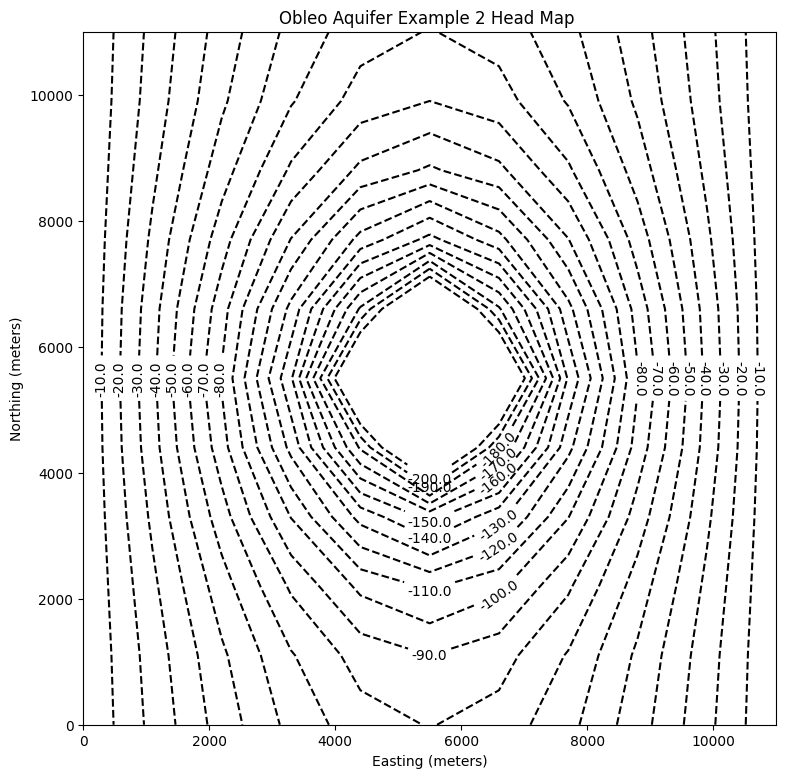

In [18]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 0))
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 0., 10.)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

Now for pretty mapping!

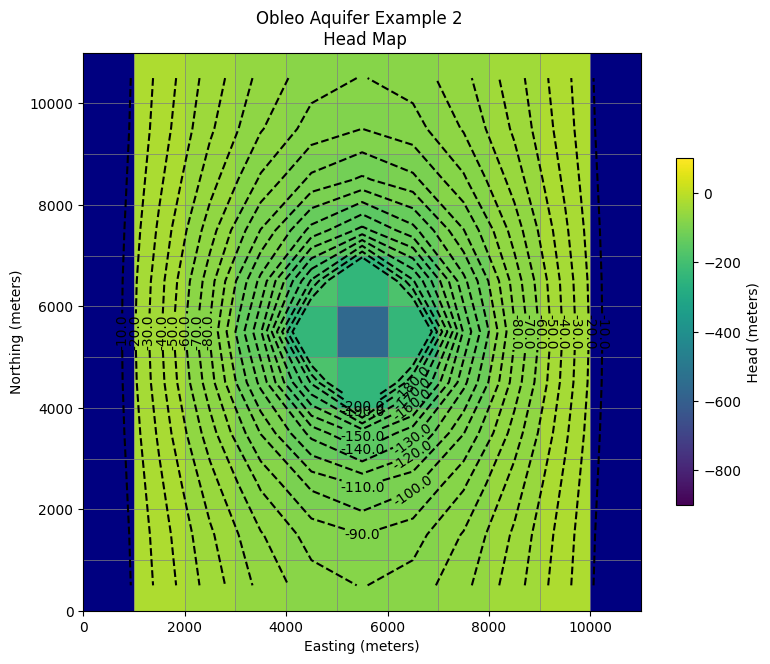

In [19]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

So this seems like a working model next we need to see if the heads are no less than -650 meters (the minimum allowed saturated thickness).  We already have this information contained in the output object.

In [20]:
print("Minimum allowed is -650.0 meters")
print("Pumping at P-1 is:",wel_rec[0][3]/1e6," Mm^3/yr")
print("Minimum Head is:",round(h[0].min(),1)," meters")
if h[0].min() < -650.0:
    print("Computed head is below allowed value - reduce pumpage and rerun simulation")

Minimum allowed is -650.0 meters
Pumping at P-1 is: -2114.0  Mm^3/yr
Minimum Head is: -563.4  meters


# 11.3 Transient Flow, Single Layer Aquifer

This example is adapted from the Obleo aquifer case, with modifications to make into an unsteady model.

## Obleo Aquifer Unsteady Example 
This is a transient model of the Obleo aquifer system 

:::{note}
This model is the identical conceptualization as the prior model, except we will use unsteady flow modeling.  We run the simulation to near equilibrium and should get about the same results.
:::

![](obleoaquifer.png)

Sone added information about the system is:

![](obleoparticulars.png)

The general goals for the analysis are:

![](obleogoals.png)

So with a little infomration regarding how we will manage elevations we can move forward with the modeling effort.

![](obleovertdatum.png)

Now onto **modflow**

:::{warning}
Nearly every cell throws a deprecation warning, that filterwarnings('ignore') fails to suppress.  Code seems to still run on my server, but over time as new updates are added to the kernel the code at some point will fail without addressing the warning.  The development computer is `aarch64` an arm processor.  The AWS server is `amd64/intel` architecture, which gets a lot of code development so should stay current longer.  This continuous integration CI and push changes model of modern IT support is phenomenally annoying, but for time being have to get used to it.
:::

In [21]:
%reset -f

In [22]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [23]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [24]:
#dir(flopy.mf6)

In [25]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY DEVELOPMENT computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/example_3" # location on MY DEVELOPMENT computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-3354-webroot/hydrohandbook/chapters/11-groundwatermodels/mfexperiments/example_2" # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name
name = "example_2"
#modelname=name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [26]:
# Set Time Structure
Time_Units="YEARS"

# Multiple stress periods
nper = 3 # how many periods
perlen = [1.0, 100.0, 100.0] # how long each one
nstp = [1, 100, 100] # how many steps in each
steady = [True, False, False] # which ones are steady

perioddata = [(1.0,1,1),(30.0,30,1),(30.0,30,1)]

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=3, perioddata=perioddata,
)

In [27]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [28]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [29]:

# Define The Grid
Nlay = 1 #number layers
Nrow = 11 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 100.0 # elevation of top of aquifer
thick = 1000.0 #aquifer thickness

bot = [topelev-thick] # bot is a list with Nlay entries
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [30]:
# Define initial conditions
h1 = 0.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [31]:
# Define hydraulic conductivity arrays
K = 3650.0
k = K * np.ones((Nlay, Nrow, Ncol)) # Hydraulic conductivity is K everywhere
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky

##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [32]:
# Define the storativity arrays
Sy = 0.25 # specific yield
Ss = 2.5e-4 # specific storage

sto = flopy.mf6.ModflowGwfsto(gwf, sy=Sy)

In [33]:
# Define constant head boundary conditions - these need to be supplied for each stress period
chd_rec = []
#h2 = 90 # Just a different value 
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
for layer in range(0, Nlay):
    for row in range(0, Nrow):
        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

stress_period_data = {0: chd_rec, 1: chd_rec, 2: chd_rec} # dictionary same BC each stress period
        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=stress_period_data,save_flows=True,
)

In [34]:
# Define wellfields
#wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
#wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr
# Multiple Stress Periods
pumping_rate = -1000e6
wel_sp1 = [[0, 5, 5, 0.0]]
wel_sp2 = [[0, 5, 5, 1*pumping_rate]]
wel_sp3 = [[0, 5, 5, 2.115*pumping_rate]]
stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3}
#wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)



##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=1,stress_period_data=stress_period_data,)

In [35]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only

rec_sp1 = rech_rec
rec_sp2 = rech_rec
rec_sp3 = rech_rec

stress_period_data = {0: rec_sp1, 1: rec_sp2, 2: rec_sp3}

#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=stress_period_data,)
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=stress_period_data,)

#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [36]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [37]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [38]:
# Write files to the directory
sim.write_simulation();

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example_2...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [39]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation(silent=True, report=True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

0.9213486227356531


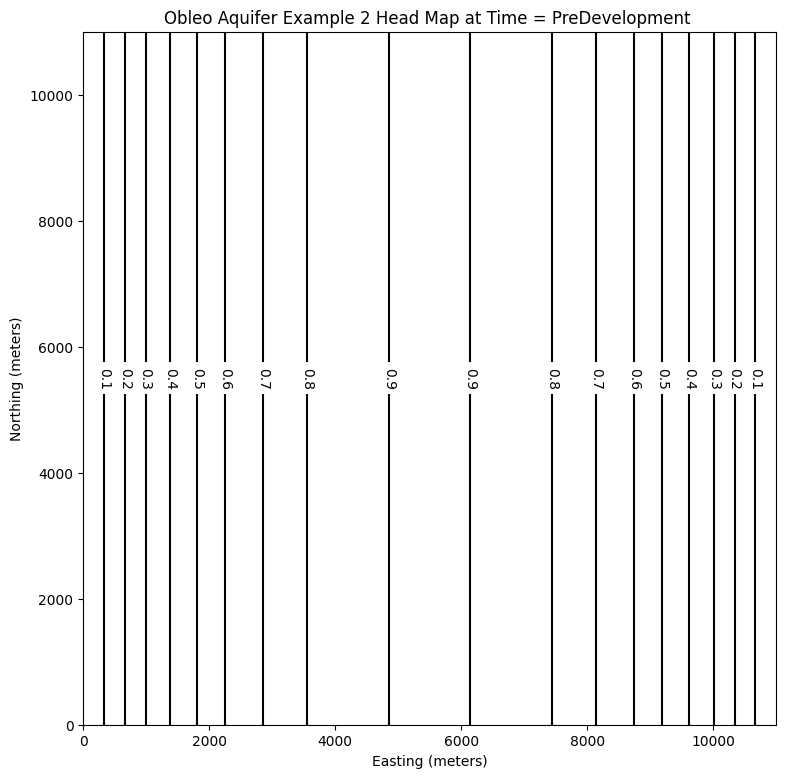

In [40]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 0))
print(h[0].max())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-10., 1.0, 0.1)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = PreDevelopment ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

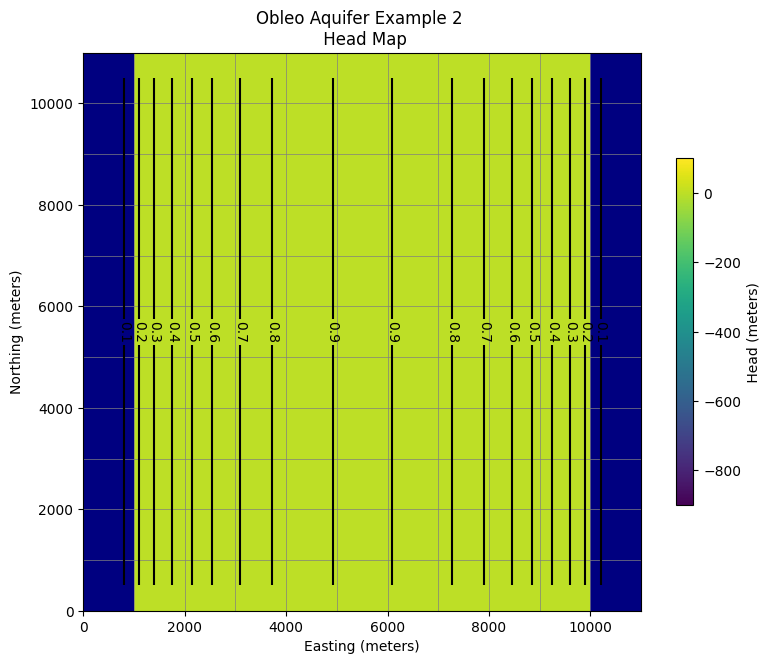

In [41]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

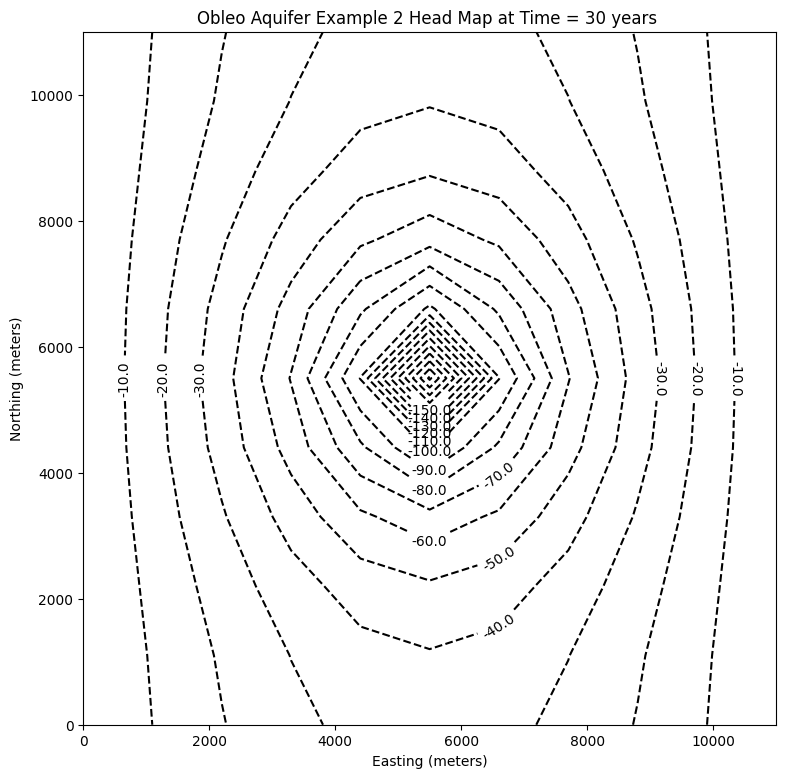

In [42]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 1))
#print(h[0].min())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 1.0, 10)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = 30 years ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

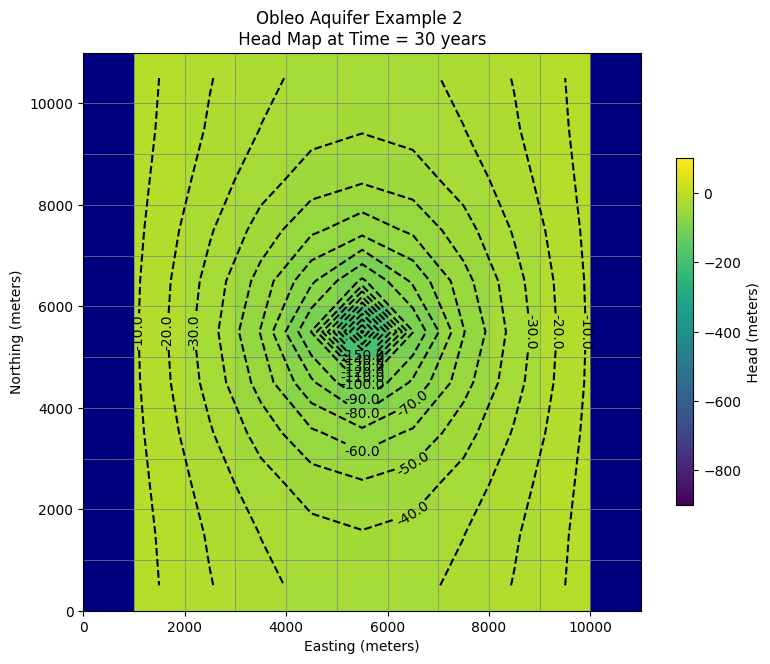

In [43]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map at Time = 30 years ")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

0.0


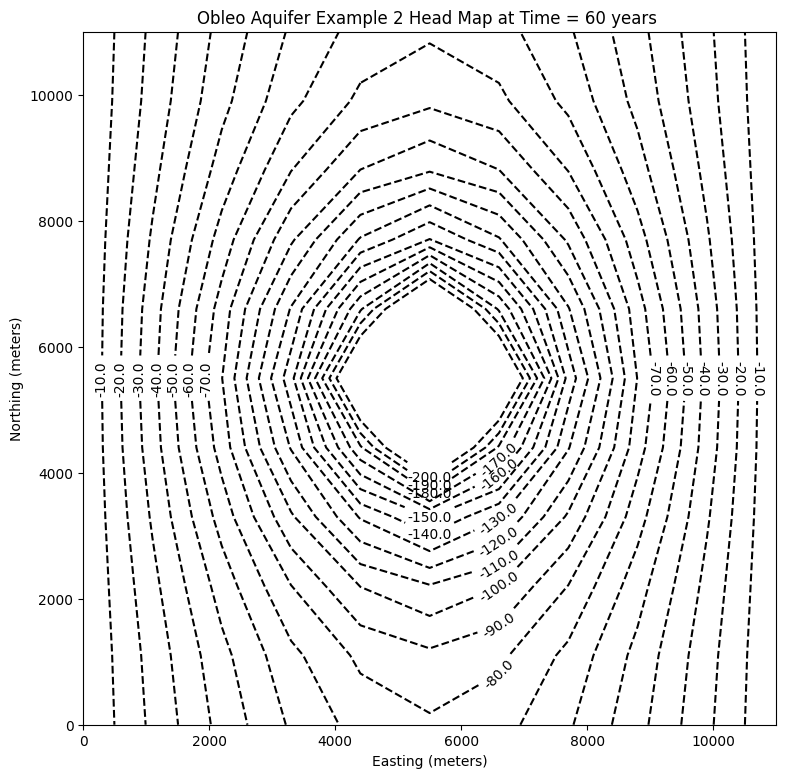

In [44]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(0, 2))
print(h[0].max())
x =  np.linspace(0, delrow*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -200., 100.0
contour_intervals = np.arange(-200., 1.0, 10)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Obleo Aquifer Example 2 Head Map at Time = 60 years ")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

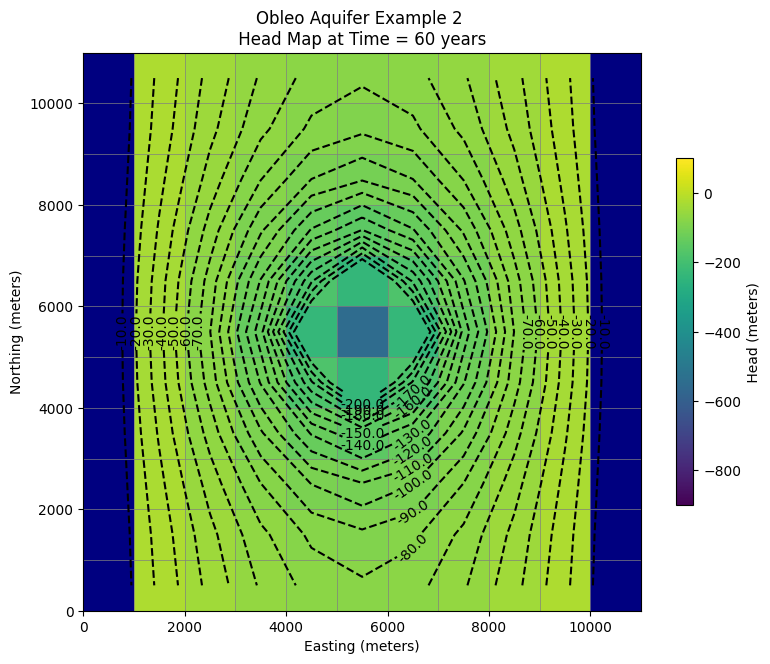

In [45]:
# ### Use the FloPy `PlotMapView()` capabilities for MODFLOW 6

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_title("Obleo Aquifer Example 2 \n Head Map at Time = 60 years ")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
modelmap = flopy.plot.PlotMapView(model=gwf, ax=ax)
pa = modelmap.plot_array(h, vmin=-900, vmax=100)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=contour_intervals,
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")

cb = plt.colorbar(pa, shrink=0.5, ax=ax)
cb.set_label(' Head (meters) ', rotation=90)

Now for pretty mapping!

So this is the working model, so now we can assess effect of pumping and decide if we can increase the pumping any We already have this information contained in the output object.

In [46]:
print("Minimum allowed is -650.0 meters")
#print("Pumping at P-1 is:",wel_rec[0][3]/1e6," Mm^3/yr")
print("Minimum Head is:",round(h[0].min(),1)," meters")
if h[0].min() < -650.0:
    print("Computed head is below allowed value - reduce pumpage and rerun simulation")

Minimum allowed is -650.0 meters
Minimum Head is: -552.3  meters


# 11.4 Transient Flow, Mulitple-Layer Aquifer 

The figure below is a map and cross section of an aquifer system.  

![](drawing_P-12.png)

Two well fields operate in the area; well field A pumping $10 \times 10^{6} \frac{m^3}{yr}$ and a well field B pumping $16 \times 10^{6} \frac{m^3}{yr}$ All the intake screens in well field B are below the semipervious layer.  A new wellfield, C is planned, with an annual withdrawl of $15 \times 10^{6} \frac{m^3}{yr}$ and, if possible, up to $25 \times 10^{6} \frac{m^3}{yr}$.

Use MODFLOW to evaluate the feasibility of the proposed pumping rates for well field C.  The river itself should not serve as a water source because the water rights are already apportioned (i.e. someone else owns the water).

The plan view layout and the 5-layer conceptualization are shown below.  

![](planview.png)

The vertical discritization used is a 5-layer conceptualization to mimic the aquifer system.

![](elevationview.png)

The upper aquifer layer is unconfined and the river is represented using constant head boundaries. The next layer is a confined/unconfined layer and is where the well field A wells are screened (65-125 meters).  The aquitard is a thin layer from (60-65 meters) with spatially varying hydraulic conductivity. The lower aquifers are represented as confined in MODFLOW, with well screens as shown.  

Below we use MODFLOW to produce:

1. An equilibrium head distribution for all 5 aquifer layers in this system, with zero pumping in all wellfields.  This is a pre-development case (recharge only).
2. An equilibrium head distribution for the system with only Wellfield A active (assuming 30 years is long enough to reach equilibrium).
3. An equilibrium head distribution for the system with Wellfields A and B active at the prescribed rates. (Again assuming 30 years is long enough to reach equilibrium).
4. An equilibrium head distribution for the system with Wellfields A and B active at the prescribed rates; Wellfield C is active, but rate is increased by trial-error until gradient from river indicates flow into the aquifer.  

In [47]:
%reset -f

In [48]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [49]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [50]:
#dir(flopy.mf6)


In [51]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/project_1" # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-3354-webroot/hydrohandbook/chapters/11-groundwatermodels/mfexperiments/example_3" # location on MY computer to store files this example (directory must already exist)

# Set Simulation Name
name = "example_3"
#modelname=name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name=binary, version="mf6", sim_ws=workarea
)

In [52]:
# Set Time Structure
Time_Units="YEARS"

# Multiple stress periods
nper = 4 # how many periods
# perlen = how long each one in problem time units
# nstp =  how many steps in each stress period
# tsmult = time step multiplier
# perioddata = [(perlen,nstp,tsmult),(perlen,nstp,tsmult),(perlen,nstp,tsmult) ... repeat for each stress period]

perioddata = [(30.0,30,1),(30.0,30,1),(30.0,30,1),(30.0,30,1)]

##### FLOPY Build time framework ##########
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units=Time_Units, nper=nper, perioddata=perioddata,
)

In [53]:
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html

##### FLOPY Build IMS framework ###########
ims = flopy.mf6.ModflowIms(sim, pname="ims", complexity="SIMPLE")

In [54]:
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(name)

##### FLOPY Build Model Name framework ####
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)

In [55]:
# Define The Grid
Nlay = 5 #number layers
Nrow = 24 #number rows
Ncol = 11 #number columns
# Define distances and elevations
delrow = 1000 # cell size along columns (how tall is a row)
delcol = 1000 # cell size along row (how wide is a column)
topelev = 180.0 # elevation of top of aquifer
thick = 175.0 #aquifer thickness

#bot = [topelev-thick] # bot is a list with Nlay entries
bot = np.array([125,65,60,25,0])
#print(bot)


##### FLOPY Build Model Grid framework #####
dis = flopy.mf6.ModflowGwfdis(gwf,nlay=Nlay,nrow=Nrow,ncol=Ncol,delr=delrow,delc=delcol,top=topelev,botm=bot,
)


In [56]:
# Define initial conditions
h1 = 151.0 # 
start = h1 * np.ones((Nlay, Nrow, Ncol)) # start heads are h1 everywhere

##### FLOPY Build Initial Conditions framework ###
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

In [57]:
# Define hydraulic conductivity arrays
K1 = 2*3650.0
K2 = 2*3650.0
K3 = 0.01*3650.0
K4 = 2*3650.0
K5 = 4*3650
k = np.ones((Nlay, Nrow, Ncol)) # populate k with ones
#print(k) # check structure
k[0] = K1*np.ones((1, Nrow, Ncol))
k[1] = K2*np.ones((1, Nrow, Ncol))
k[2] = K3*np.ones((1, Nrow, Ncol)) # modify for spatial varying K this layer
for irow in range(18,Nrow):
    k[2][irow] = K2
k[3] = K4*np.ones((1, Nrow, Ncol))
k[4] = K5*np.ones((1, Nrow, Ncol))
#print(k[2]) # check structure
# Use above to build layer-by-layer spatial varying K
# need to read: to deal with Kx!=Ky

##### FLOPY Build BCF framework ######
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=1, k=k, save_flows=True) 
# setting icelltype > 0 is unconfined 
# https://flopy.readthedocs.io/en/3.3.5/source/flopy.mf6.modflow.mfgwfnpf.html?highlight=icelltype#flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf.icelltype

In [58]:
# Define the storativity arrays
Sy = 0.25 # specific yield
Ss = 2.5e-4 # specific storage

sto = flopy.mf6.ModflowGwfsto(gwf, sy=Sy)

In [59]:
# Define constant head boundary conditions - these need to be supplied for each stress period
chd_rec = []
hriv = 151 # river as a boundary
for col in range(0,Ncol):
    chd_rec.append(((0, 6 , col), hriv)) # river as a boundary
#chd_rec.append(((0, 5, 5), h2))
# L,R,T,B constant head boundaries
#for layer in range(0, Nlay):
#    for row in range(0, Nrow):
#        chd_rec.append(((layer, row, 0), h1))  #left column held at h1
#        chd_rec.append(((layer, row, Ncol-1), h1)) #right column held at h1
#    for col in range(1,Ncol-1):
#        chd_rec.append(((layer, 0, col), h1)) # top row held at h1
#        chd_rec.append(((layer, Nrow-1 , col), h1)) # bottom row held at h1

stress_period_data = {0: chd_rec, 1: chd_rec, 2: chd_rec, 3: chd_rec} # dictionary same BC each stress period
        
##### FLOPY Build CHD framework #####          
chd = flopy.mf6.ModflowGwfchd(gwf,maxbound=len(chd_rec),stress_period_data=stress_period_data,save_flows=True,
)

In [60]:
# Define wellfields
#wel_rec = []
# wel_rec.append((0, 5, 5, -0e6)) # 0 Mm3/yr - use to examine recharge only
#wel_rec.append((0, 5, 5, -2114e6)) # 2,114 Mm3/yr
# Multiple Stress Periods


wel_sp1 = []
wel_sp1.append((0, 21, 5, -0.01)) #wellfieldA-upper
wel_sp1.append((1, 21, 5, -0.01)) #wellfieldA-lower
wel_sp1.append((3, 14, 6, -0.01)) #wellfieldB-upper
wel_sp1.append((4, 14, 6, -0.01)) #wellfieldB-lower
wel_sp1.append((3, 4, 6, -0.01)) #wellfieldC-upper
wel_sp1.append((4, 4, 6, -0.01)) #wellfieldC-lower

wel_sp2 = []
wel_sp2.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp2.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp2.append((3, 14, 6, -0.1)) #wellfieldB-upper
wel_sp2.append((4, 14, 6, -0.1)) #wellfieldB-lower
wel_sp2.append((3, 4, 6, -0.1)) #wellfieldC-upper
wel_sp2.append((4, 4, 6, -0.1)) #wellfieldC-lower

wel_sp3 = []
wel_sp3.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp3.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp3.append((3, 14, 6, -8.0e6)) #wellfieldB-upper
wel_sp3.append((4, 14, 6, -8.0e6)) #wellfieldB-lower
wel_sp3.append((3, 4, 6, -0.1)) #wellfieldC-upper
wel_sp3.append((4, 4, 6, -0.1)) #wellfieldC-lower

wel_sp4 = []
wel_sp4.append((0, 21, 5, -5.0e6)) #wellfieldA-upper
wel_sp4.append((1, 21, 5, -5.0e6)) #wellfieldA-lower
wel_sp4.append((3, 14, 6, -8.0e6)) #wellfieldB-upper
wel_sp4.append((4, 14, 6, -8.0e6)) #wellfieldB-lower
wel_sp4.append((3, 4, 6, -3.0e6)) #wellfieldC-upper
wel_sp4.append((4, 4, 6, -5.0e6)) #wellfieldC-lower

stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3, 3: wel_sp4}
#wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)



##### FLOPY Build Wellfields framework #####  
wel = flopy.mf6.ModflowGwfwel(gwf,maxbound=6,stress_period_data=stress_period_data,)

In [61]:
# Define recharge
rech_val = 0.25 #  rate as depth/year
rech_rec = rech_val * np.ones((1, Nrow, Ncol)) # set recharge top layer only

rec_sp1 = rech_rec
rec_sp2 = rech_rec
rec_sp3 = rech_rec

stress_period_data = {0: rec_sp1, 1: rec_sp2, 2: rec_sp3}

#rch = flopy.mf6.ModflowGwfrcha(gwf, maxbound=len(rech_rec),recharge=stress_period_data,)
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=stress_period_data,)

#rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=rech_val) # default entry format

In [62]:
# something to do with stress periods
iper = 0
ra = chd.stress_period_data.get_data(key=iper)


In [63]:
# Create the output control (`OC`) Package
headfile = "{}.hds".format(name)
head_filerecord = [headfile]
budgetfile = "{}.cbb".format(name)
budget_filerecord = [budgetfile]
saverecord = [("HEAD", "ALL"), ("BUDGET", "ALL")]
printrecord = [("HEAD", "LAST")]

##### FLOPY Build OC framework
oc = flopy.mf6.ModflowGwfoc(
    gwf,
    saverecord=saverecord,
    head_filerecord=head_filerecord,
    budget_filerecord=budget_filerecord,
    printrecord=printrecord,
)

In [64]:
# Write files to the directory
sim.write_simulation();

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example_3...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package wel_0...
    writing package rcha_0...
    writing package oc...


In [65]:
# Attempt to run MODFLOW this model
success, buff = sim.run_simulation(silent=True, report=True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

179.42766115495905
179.42524150729793


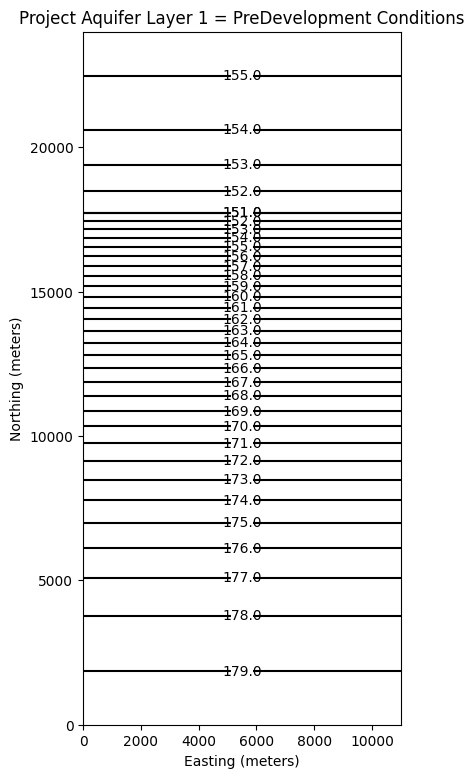

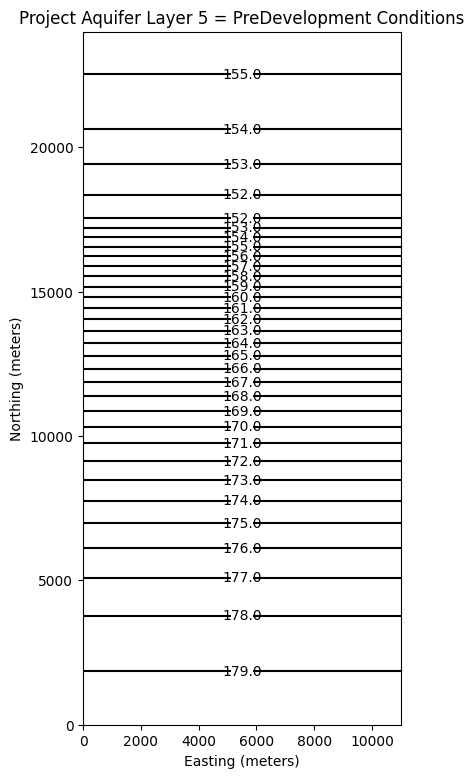

In [66]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 0))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = PreDevelopment Conditions")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = PreDevelopment Conditions")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

170.3240007892975
170.32146880491723


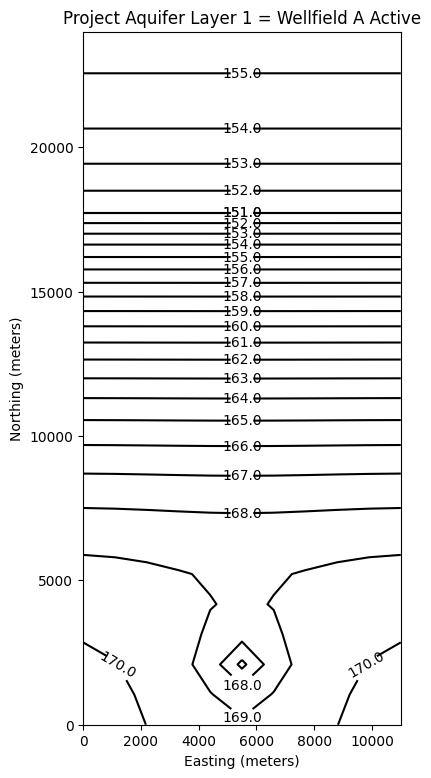

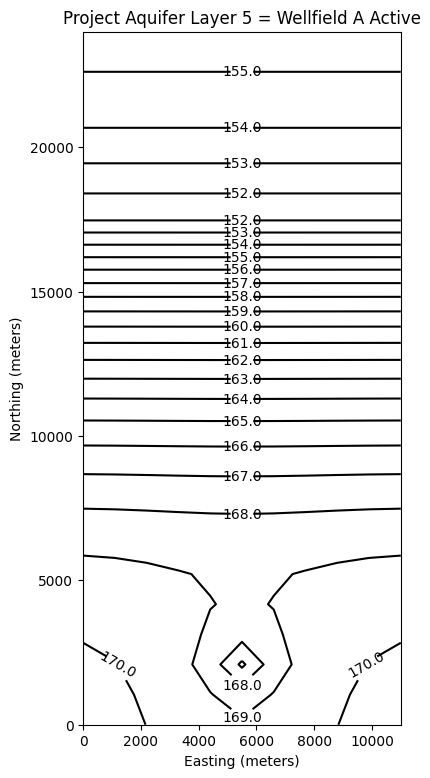

In [67]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 1))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = Wellfield A Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = Wellfield A Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

161.8575008612184
161.85485401337985


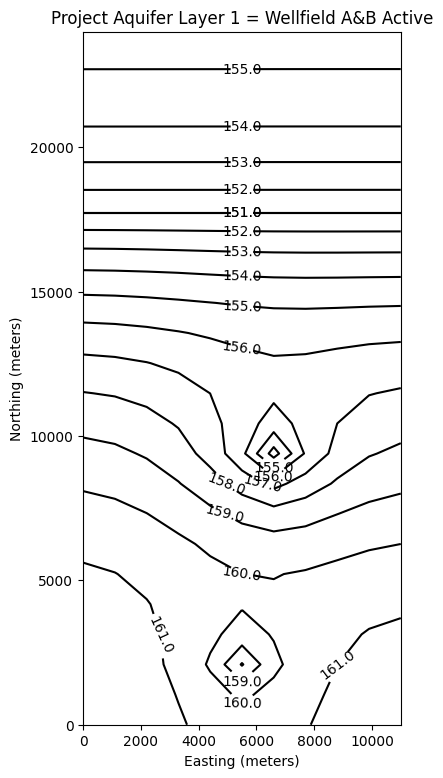

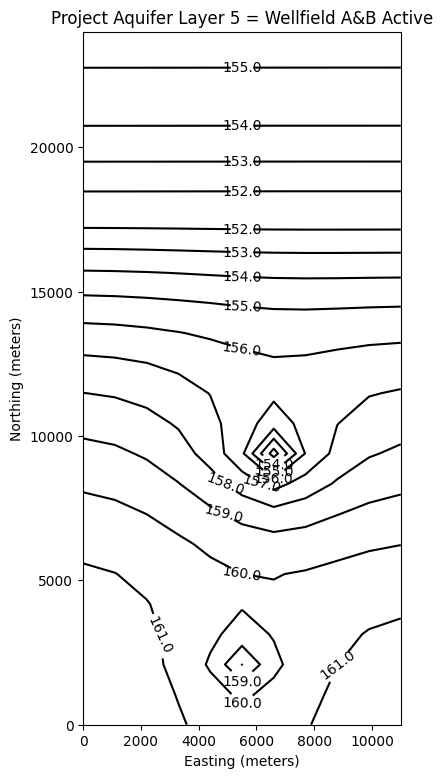

In [68]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 2))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 1.0)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 = Wellfield A&B Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 = Wellfield A&B Active")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

161.83147923607353


161.82883201930647


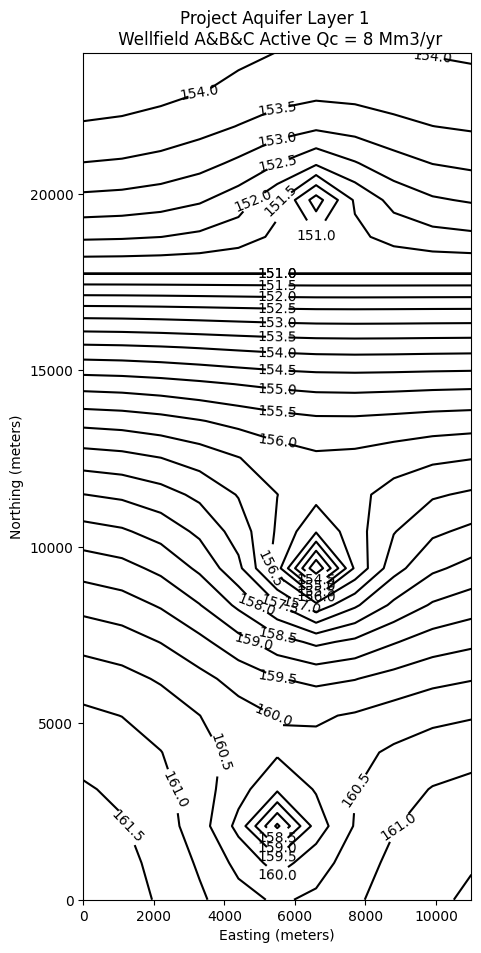

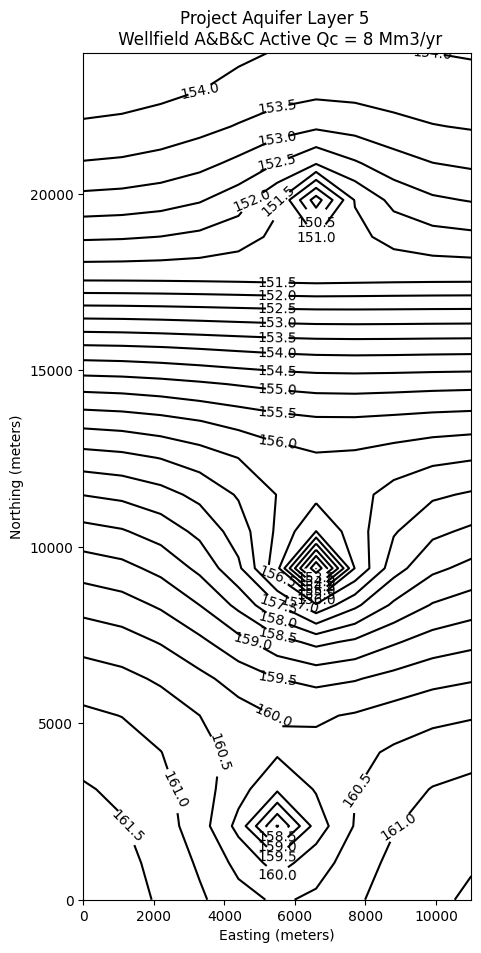

In [69]:
# now attempt to postprocess
h = gwf.output.head().get_data(kstpkper=(29, 3))
print(h[0].max())
#print(h[0])
#x = np.linspace(0, LC, Ncol )
x =  np.linspace(0, delcol*Ncol, Ncol)
y =  np.linspace(0, delrow*Nrow, Nrow)
y = y[::-1]
vmin, vmax = -0., 175.0
contour_intervals = np.arange(0, 200.0, 0.50)

# ### Plot a Map of Layer 1

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[0], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 1 \n Wellfield A&B&C Active Qc = 8 Mm3/yr")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

# ### Plot a Map of Layer 5

print(h[4].max())

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
c = ax.contour(x, y, h[4], contour_intervals, colors="black")
plt.title("Project Aquifer Layer 5 \n Wellfield A&B&C Active Qc = 8 Mm3/yr")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.clabel(c, fmt="%2.1f");

So for the stated problem, wellfield C is limited to about $8~\frac{Mm^3}{yr}$ if the goal is to avoid river flow into the aquifer.

The next steps are to add stress periods according to the annual pumping schedule to examine the effect time-of-year has on the heads.

# 11.5 Exercise(s)

LINK TO EXERCISE

AUTOBUILD CODE TO GENERATE EXERCISE

## Section End